In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Evita di stampare i warning

# Definizione del problema

Il dataset in esame (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data) contiene dati clinici di pazienti, nello specifico informazioni che potrebbero essere legate all'insufficienza caridaca. L'obiettivo è quello di prevedere, sulla base delle varie informazioni cliniche, se un paziente risulta a rischio di insufficienza caridaca (heart failure).

Nota: Con insufficienza cardiaca non si intende necessariamente arresto cardiaco, ma si tratta di una condizione che potrebbe causarlo.

In [3]:
dataset = pd.read_csv("heart.csv")

# Analisi del dataset

In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Descrizione delle feature:
- Age -> Età del paziente
- Sex -> Sesso del paziente
- ChestPainType -> Tipologia di dolore al petto:
    [*TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic*]
- RestingBP -> Pressione del sangue a riposo [*mmHg*]
- Cholesterol -> Livello di colesterolo [*mm/dl*]
- FastingBS -> Glicemia a digiuno:
    [*1: if FastingBS > 120 mg/dl, 0: otherwise*]
- RestingECG -> Risultati dell'elettrocardiogramma a riposo:
     [*Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria*]
- MaxHR -> Massimo numero di battiti raggiunto
- ExerciseAngina -> Presenza di angina da sforzo:
    [*Y: Yes, N: No*]
- Oldpeak -> Depressione del tratto ST misurata dall'elettrocardiogramma
- ST_Slope -> Inclinazione della porzione finalde del tratto ST:
    [*Up: upsloping, Flat: flat, Down: downsloping*]
- HeartDesease -> Presenza di malattia cardiaca:
    [*1: heart disease, 0: Normal*]

La feature target è "HeartDesease" e tutte le altre feature saranno considerate utili (previa ulteriore analisi) ai fini della predizione.

In [7]:
print("dataset shape: " + str(dataset.shape) + "\n")
print(dataset.info())

dataset shape: (918, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Il dataset non presenta valori assenti.

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Per le feature categoriche si decide di utilizzare un approccio differente per la visualizzazione.

In [ ]:
# TODO stampa grafici a torta delle feature categoriche

## Analisi del bilanciamento delle classi target

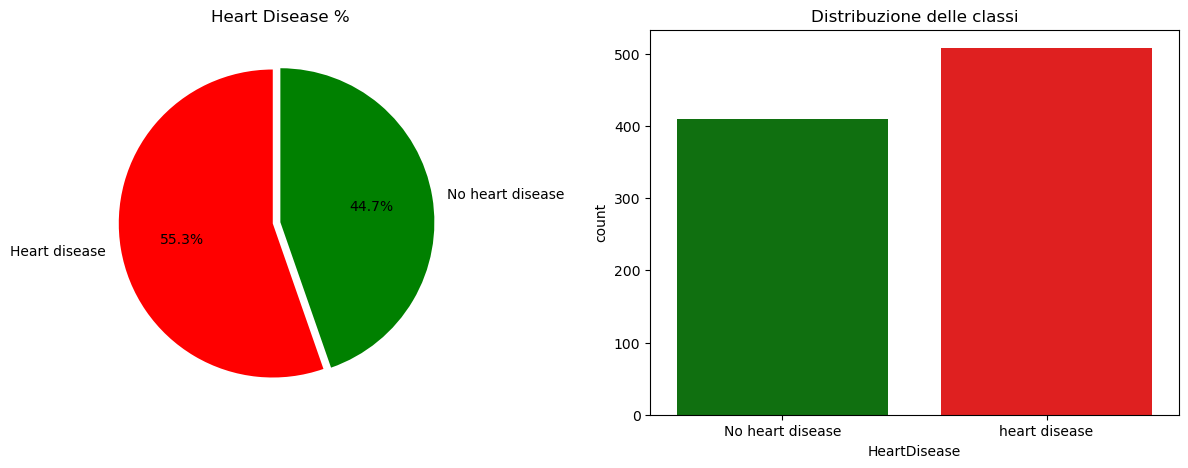

In [21]:
label_counts = dataset['HeartDisease'].value_counts()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(label_counts, labels=['Heart disease', 'No heart disease'], autopct='%1.1f%%',
        startangle=90, explode=(0.05,0), colors=['red', 'green'])
plt.title("Heart Disease %")

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease', data=dataset, palette=['green', 'red'])
ax.set_xticklabels(['No heart disease', 'heart disease'])
plt.title("Distribuzione delle classi")

plt.show()

Le classi risultano sbilanciate in modo lieve, pertanto si decide di non applicare al momento alcuna tecnica di bianciamento. Si valuterà in seguito se questa decisione sia stata opportuna.

## Analisi delle feature categoriche

Si decide di suddividere le feature del dataset in due dataframe, uno contenente le feature categoriche e uno contenente le feature numeriche, in modo tale da poterle analizzare in modo adeguato. Siccome alcune feature catecoriche sono rappresentate attraverso valori numerici (es. *FastingBS* assume valori 0 e 1) si decide di considerare una feature come numerica se presenta più di 7 (soglia arbitraria) valori differenti.

In [ ]:
# TODO valuta se mantenere !!!!!!!


col = list(dataset.columns)
numerical_treshold = 7

categorical_features = []
numerical_features = []

for i in col:
    if (len(dataset[i].unique()) > numerical_treshold):
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        
print('Categorical Features: ' + str(categorical_features))
print('Numerical Features: ' + str(numerical_features))

Categorical Features: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


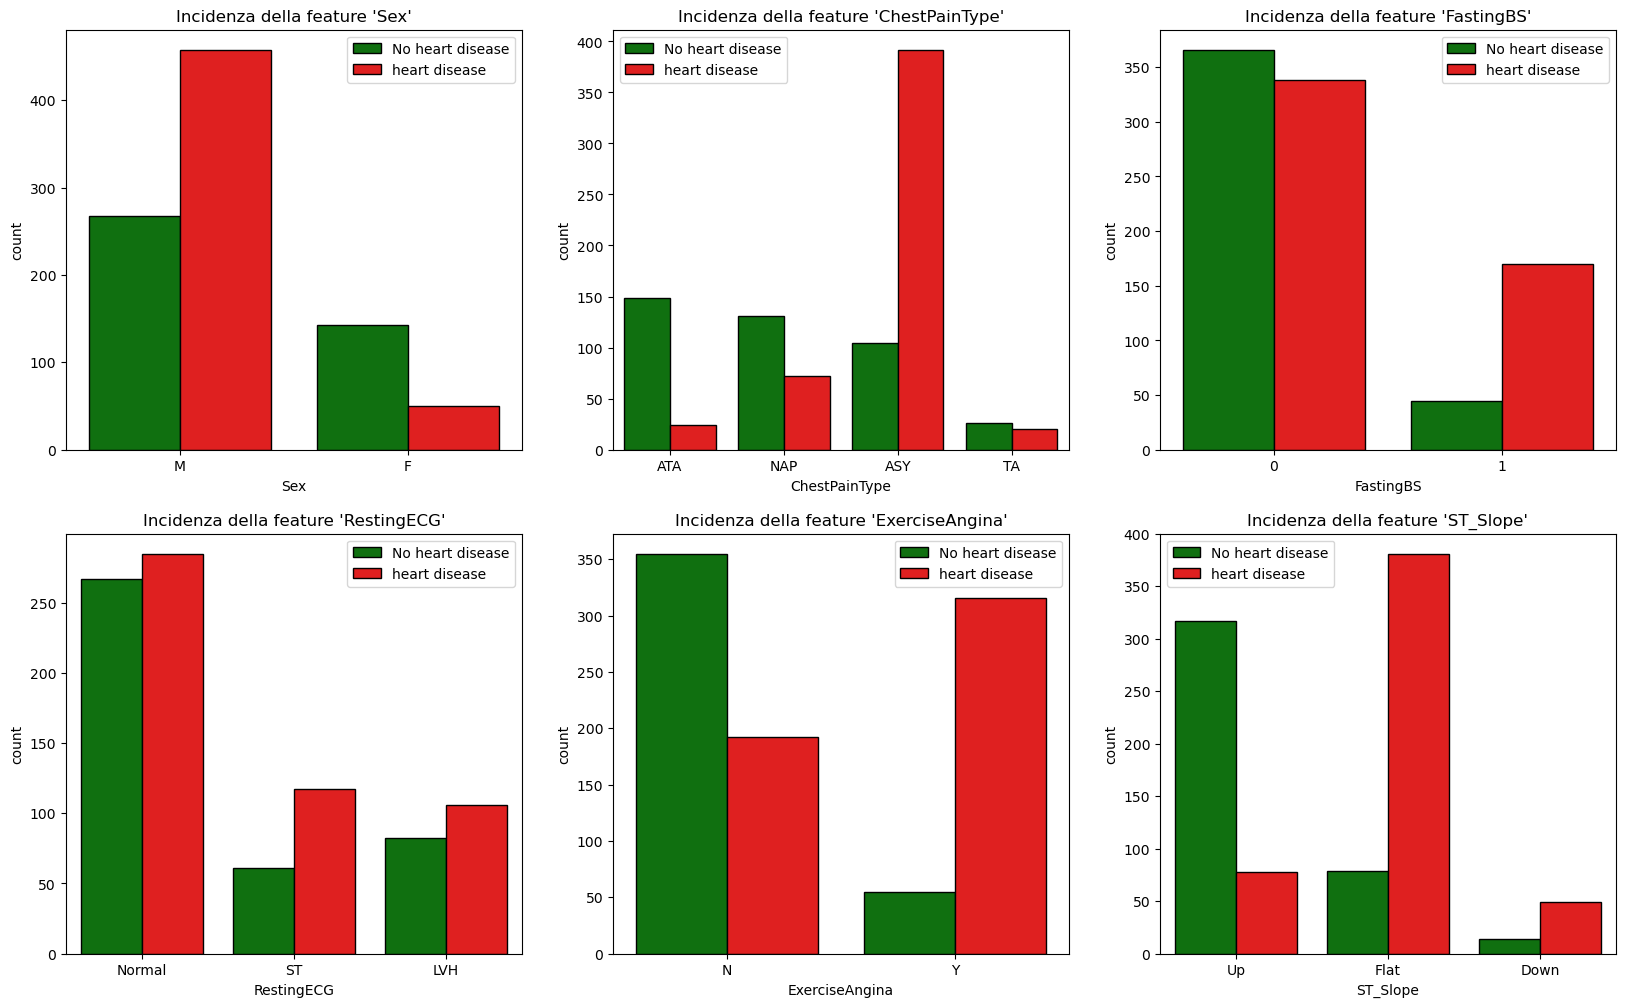

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

# plot Sex feature
plt.subplot(2,3,1)
feature_name = 'Sex'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ChestPainType feature
plt.subplot(2,3,2)
feature_name = 'ChestPainType'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot FastingBS feature
plt.subplot(2,3,3)
feature_name = 'FastingBS'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot RestingECG feature
plt.subplot(2,3,4)
feature_name = 'RestingECG'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ExerciseAngina feature
plt.subplot(2,3,5)
feature_name = 'ExerciseAngina'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ST_Slope feature
plt.subplot(2,3,6)
feature_name = 'ST_Slope'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")



plt.show()

